# Vandenberg Data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Importing the File

In [4]:
vandenberg = pd.read_csv('vandenBerg_table2.csv')

In [6]:
vandenberg.head()

,#NGC,Name,FeH,Age,Age_err,Method,Figs,Range,HBtype,R_G,M_V,v_e0,log_sigma_0
0,104,47Tuc,-0.76,11.75,0.25,V,14,11.50–11.75,-0.99,7.4,-9.42,54.8,5.061
1,288,XXXX,-1.32,11.50,0.38,H,24,NaN,0.98,12.0,-6.75,10.9,2.953
2,362,XXXX,-1.30,10.75,0.25,V,13,10.75–11.00,-0.87,9.4,-8.43,44.4,4.938
3,1261,XXXX,-1.27,10.75,0.25,V,13,10.75–11.25,-0.71,18.1,-7.80,23.6,3.913
4,1851,XXXX,-1.18,11.00,0.25,V,13,10.75–11.25,-0.32,16.6,-8.33,47.6,5.136


We can access a specific column using `[]`
```python
df['column_name']
```

In [7]:
# Lets checkout the visual magnitude of harris_p2

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yangf\AppData\Local\Temp\ipykernel_39284\1296356406.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma$ (km/s)')


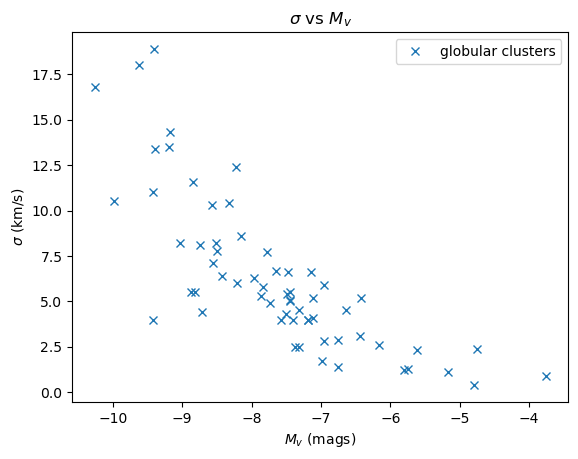

In [27]:
# Lets recreate the graph
# Convert the column to a number and make any errors NaN (Not A Number)
harris_p2['M_V,t'] = pd.to_numeric(harris_p2['M_V,t'], errors='coerce')

# Plot the data
plt.plot(
    harris_p2['M_V,t'],
    harris_p3['sig_v'],
    'x',
    label='globular clusters'
)

# Label the data 
plt.title(r'$\sigma$ vs $M_v$')
plt.xlabel('$M_v$ (mags)')
plt.ylabel('$\sigma$ (km/s)')
plt.legend()

# Exercises

## 1) Write some markdown 

Write some markdown here

## 2) CATALOG OF PARAMETERS FOR MILKY WAY GLOBULAR CLUSTERS
### a) Import Harris 1 Data set and convert the metallicity column to numerical data
### b) Plot X vs Z for globular clusters for clusters with metallicity greater than 0.8 and less than 0.8. (Hint: Harris 1 has X, Y, Z coordinates while Harris 2 has metallicity)
### c) Count how many clusters have a metallicity greater than 0.8.

A description of the data can be found in [Catalogue of Parameters for Milky Way Clusters by Harris](https://physics.mcmaster.ca/~harris/mwgc.dat) and [The Ages of 55 Globular Clusters as Determined Using an Improved \Delta V^HB_TO Method along with Color-Magnitude Diagram Constraints, and Their Implications for Broader Issues](https://ui.adsabs.harvard.edu/abs/2013ApJ...775..134V/abstract)  
Velocity Dispersion:https://astronomy.swin.edu.au/cosmos/v/Velocity+Dispersion  
Absolute Magnitude:https://astronomy.swin.edu.au/cosmos/A/Absolute+Magnitude  
Half Light Radius:https://astronomy.swin.edu.au/cosmos/H/Half-light+Radius

In [28]:
# 2) a)
harris_p1 = pd.read_csv('HarrisPartI.csv')
harris_p1.head()

,ID,Name,RA,DEC,L,B,R_Sun,R_gc,X,Y,Z
0,NGC 104,47 Tuc,00:24:05.67,-72:04:52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
1,NGC 288,NaN,00:52:45.24,-26:34:57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,-8.9
2,NGC 362,NaN,01:03:14.26,-70:50:55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
3,Whiting 1,NaN,02:02:57,-03:15:10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
4,NGC 1261,NaN,03:12:16.21,-55:12:58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9


In [10]:
# 2) b)

In [11]:
# 2) c)

## 3) The Ages of 55 Globular Clusters as Determined Using an Improved \Delta V^HB_TO Method along with Color-Magnitude Diagram Constraints, and Their Implications for Broader Issues
### a) Merge Harris 1 and vanderBurg together to one dataframe and save it
### b) How many globular clusters are common between the two surveys?



Hint for these exercises, you will need a bit more help.

Hint 1: vandenBurg stores the NGC id (New General Catalogue) (i.e. 111 means NGC 111)  
Hint 2:
Let's consider the two dataframes.
They share data regarding the same star, but have slightly different naming conventions that makes it hard to consolidate.

Dataframe 1:
| id          | height      |
| ----------- | ----------- |
| 1           | 1           |
| 2           | 2           |
| 3           | 3           |

Dataframe 2:

| star_id | height |
|---------|--------|
| Star 1  | 1      |
| Star 2  | 2      |
| Star 4  | 4      |

In [29]:
df1 = pd.DataFrame({
    'id': ['1', '2', '3'],
    'height': ['1', '2', '3']
})
df2 = pd.DataFrame({
    'star_id': ['Star 1', 'Star 2', 'Star 4'],
    'width': ['1', '2', '4']
})

To merge these two dataframes we need to complete a few operations:
1. Rename the column to be the same name to allow for the join
2. Update `id` column to mean the same format `Star X`
3. Save the dataframe

To rename columns, we can use 
`df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)`

In [30]:
# renaming the columns in df1 to be 'star_id`
df1.rename(columns={'id': 'star_id'}, inplace=True)
df1

,star_id,height
0,1,1
1,2,2
2,3,3


Apply an operation using `apply` method `df['column'] = df['column'].apply(func))`

In [14]:
# Add Star to the start of the id column for dataframe 1 to match dataframe 2
def add_star(s):
    return "Star " + s
df1['star_id'] = df1['star_id'].apply(add_star)
df1

,star_id,height
0,Star 1,1
1,Star 2,2
2,Star 3,3


Merge dataframes on common column using `pd.merge`
Example: `df = pd.merge(df1, df2, on='star_id')`

In [15]:
# Merge the two dataframes on 'star_id'
df = pd.merge(df1, df2, on='star_id')
df

,star_id,height,width
0,Star 1,1,1
1,Star 2,2,2


Save to csv file for later using `df.to_csv('file_name.csv, index=False)`

In [16]:
# Save id
df.to_csv('dataframe.csv', index=False)

In [17]:
# 3) a)

In [18]:
# 3) b)